<h1 style="text-align:center;">Animal classification</h1>

<h3 style="text-align:center;">By: Álvaro García Vásquez</h3>
<h4 style="text-align:center;">04/04/2024</h4>
<p style="text-align:center;">
    <a href="https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/" target="_blank">LinkedIn</a> |
    <a href="https://github.com/AlvaroVasquezAI" target="_blank">GitHub</a> |
    <a href="https://huggingface.co/datasets/AlvaroVasquezAI/Animal_Image_Classification_Dataset/" target="_blank">Hugging Face</a> |
    <a href="https://www.instagram.com/alvarovasquez.ai/" target="_blank">Instagram</a> |
    <a href="https://twitter.com/alvarovasquezai" target="_blank">Twitter</a> |
    <a href="https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA" target="_blank">YouTube</a> |
    <a href="mailto:agarciav2102@alumno.ipn.mx">Email</a>
</p>

In this project, I developed an animal classifier using transfer learning techniques with the ResNet50 model, pre-trained on ImageNet. My objective was to differentiate between three animal categories: cats, dogs, and snakes, using a dataset of 3,000 images. The classifier underwent training, validation, and testing phases to ensure its accuracy and robustness. To enhance user interaction and practical application, I designed a user interface (UI) using Tkinter, enabling real-time image classification and feedback on the model’s predictions. This project not only demonstrates the application of deep learning in image classification but also provides a platform for users to interact with the model, highlighting the potential of machine learning in real-world scenarios.

<h2 style="text-align:center;">Table of contents</h2>

1. [Introduction](#introduction)
2. [Importing libraries](#importing-libraries)
3. [Data preprocessing](#data-preprocessing)
4. [Loading the ResNet50 model](#loading-the-resnet50-model)
5. [Data augmentation and augmentation](#data-augmentation-and-augmentation)
6. [Model training](#model-training)
7. [Model evaluation](#model-evaluation)
8. [Saving the model](#saving-the-model)
9. [User interface](#user-interface)

<h2 id="introduction" style="text-align:center;">Introduction</h2>

In this project, I employed transfer learning to create an animal classifier capable of distinguishing between cats, dogs, and snakes. Leveraging the ResNet50 model, pre-trained on the vast ImageNet database, I fine-tuned it on a carefully curated dataset of 3,000 images, ensuring an equal representation of each animal category. Following the training phase, the model's effectiveness was rigorously evaluated on a separate test set.

To make the model accessible and practical for real-world applications, I designed an intuitive user interface (UI) using Tkinter. This interface allows users to upload images for classification, providing immediate feedback on the identified animal type along with the model’s confidence level.

In the introduction, I delve into the methodology of using the ResNet50 architecture, renowned for its robust performance in image classification tasks. The dataset comprises 1,000 images each of cats, dogs, and snakes, selected to encompass a wide variety of scenarios and poses, thus enhancing the model's ability to generalize across different environments.

Through data augmentation techniques like rotation, shifting, and flipping, I enhanced the model's robustness, preparing it for diverse real-world imaging conditions. The model's learning was then fine-tuned and validated on a distinct set of images, with the goal of optimizing its accuracy and performance.

Finally, the project's capstone is the creation of a user-friendly UI, which transforms the trained model from a theoretical construct into a tangible, interactive tool. This interface encourages users to engage with the model, providing a direct pathway to explore and understand the capabilities of machine learning in image classification.

<h2 id="importing-libraries" style="text-align:center;">Importing libraries</h2>


In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense # type: ignore
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.callbacks import EarlyStopping  # type: ignore
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk, ImageOps
import numpy as np
from tensorflow.keras.preprocessing import image as keras_image # type: ignore
from tensorflow.keras.models import save_model # type: ignore
from tensorflow.keras.callbacks import Callback # type: ignore
from sklearn.metrics import classification_report 
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

<h2 id="data-preprocessing" style="text-align:center;">Data preprocessing</h2>

In [2]:
# Paths
dataset_dir = 'dataset'
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'

# Categories
categories = ['cats', 'dogs', 'snakes']

# Create directories for the train, validation, and test sets
for dir_name in [train_dir, val_dir, test_dir]:
    for category in categories:
        os.makedirs(os.path.join(dir_name, category), exist_ok=True)

# Split the data and move the files
for category in categories:
    # Get a list of images in the category directory
    files = os.listdir(os.path.join(dataset_dir, category))

    # Split the data into train, validation, and test sets
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)
    train_files, val_files = train_test_split(train_files, test_size=0.125, random_state=42)  # 0.125 x 0.8 = 0.1

    # Function to copy the files to the respective directories
    def copy_files(files, dest_dir):
        for file in files:
            shutil.copy(os.path.join(dataset_dir, category, file),
                        os.path.join(dest_dir, category, file))

    # Copy the files to the respective directories
    copy_files(train_files, train_dir)
    copy_files(val_files, val_dir)
    copy_files(test_files, test_dir)

print("Dataset successfully split into training, validation, and testing sets.")


Dataset successfully split into training, validation, and testing sets.


<h2 id="loading-the-resnet50-model" style="text-align:center;">Loading the ResNet50 model</h2>

In [3]:
# Load the ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top for our specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Construct the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print("Model loaded and compiled successfully.")

Model loaded and compiled successfully.


<h2 id="data-augmentation-and-augmentation" style="text-align:center;">Data augmentation and augmentation</h2>

In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory('train', target_size=(256, 256), batch_size=32, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory('val', target_size=(256, 256), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('test', target_size=(256, 256), batch_size=32, class_mode='categorical', shuffle=False)

print("Data generators created successfully.")

Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Data generators created successfully.


<h2 id="model-training" style="text-align:center;">Model training</h2>

Checking the training generator output...
Batch 1/65, Batch size: 32
Batch 2/65, Batch size: 32
Batch 3/65, Batch size: 32
Batch 4/65, Batch size: 32
Batch 5/65, Batch size: 32
Batch 6/65, Batch size: 32
Batch 7/65, Batch size: 32
Batch 8/65, Batch size: 32
Batch 9/65, Batch size: 32
Batch 10/65, Batch size: 32
Batch 11/65, Batch size: 32
Batch 12/65, Batch size: 32
Batch 13/65, Batch size: 32
Batch 14/65, Batch size: 32
Batch 15/65, Batch size: 32
Batch 16/65, Batch size: 32
Batch 17/65, Batch size: 32
Batch 18/65, Batch size: 32
Batch 19/65, Batch size: 32
Batch 20/65, Batch size: 32
Batch 21/65, Batch size: 32
Batch 22/65, Batch size: 32
Batch 23/65, Batch size: 32
Batch 24/65, Batch size: 32
Batch 25/65, Batch size: 32
Batch 26/65, Batch size: 32
Batch 27/65, Batch size: 32
Batch 28/65, Batch size: 32
Batch 29/65, Batch size: 32
Batch 30/65, Batch size: 32
Batch 31/65, Batch size: 32
Batch 32/65, Batch size: 32
Batch 33/65, Batch size: 32
Batch 34/65, Batch size: 32
Batch 35/65, Ba

c:\Users\alvar\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8225 - loss: 0.6831
Ending epoch 0
Metrics: {'accuracy': 0.9347195625305176, 'loss': 0.2541077733039856, 'val_accuracy': 0.9722222089767456, 'val_loss': 0.1131502091884613}
65/65 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.8242 - loss: 0.6766 - val_accuracy: 0.9722 - val_loss: 0.1132
Epoch 2/10
 1/65 ━━━━━━━━━━━━━━━━━━━━ 1:18 1s/step - accuracy: 1.0000 - loss: 0.0039

c:\Users\alvar\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Ending epoch 1
Metrics: {'accuracy': 1.0, 'loss': 0.0019486875971779227, 'val_accuracy': 1.0, 'val_loss': 4.813970372197218e-05}
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 4.8140e-05
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9886 - loss: 0.0459
Ending epoch 2
Metrics: {'accuracy': 0.9898452758789062, 'loss': 0.033996470272541046, 'val_accuracy': 0.96875, 'val_loss': 0.12002701312303543}
65/65 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9886 - loss: 0.0457 - val_accuracy: 0.9688 - val_loss: 0.1200
Epoch 4/10
 1/65 ━━━━━━━━━━━━━━━━━━━━ 1:22 1s/step - accuracy: 1.0000 - loss: 0.0043
Ending epoch 3
Metrics: {'accuracy': 1.0, 'loss': 0.0021462496370077133, 'val_accuracy': 1.0, 'val_loss': 0.00012248556595295668}
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 1.2249e-04
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9855 - lo

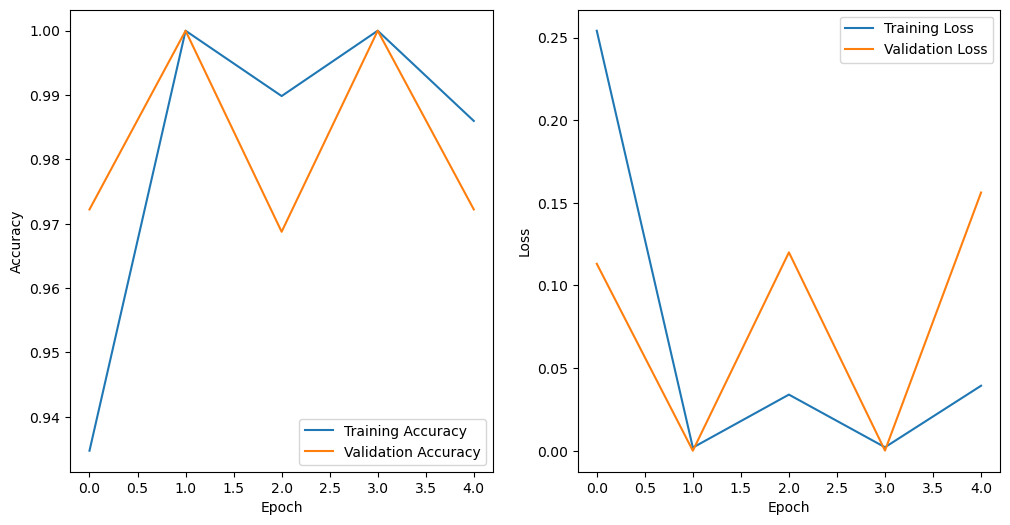

In [5]:
class DebugCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEnding epoch {epoch}")
        if logs is not None:
            print("Metrics:", logs)

early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
                               patience=3,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Whether to restore model weights from the epoch with the best value of the monitored metric

# Calculate the number of steps per epoch for the training and validation sets
train_steps_per_epoch = max(1, int(np.ceil(len(train_generator.filenames) / train_generator.batch_size)) - 1)
validation_steps = max(1, int(np.ceil(len(validation_generator.filenames) / validation_generator.batch_size)) - 1)

# Debugging the generator output
print("Checking the training generator output...")
for i, (x_batch, y_batch) in enumerate(train_generator):
    if i >= train_steps_per_epoch:
        break
    print(f"Batch {i+1}/{train_steps_per_epoch}, Batch size: {x_batch.shape[0]}")
train_generator.reset()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, DebugCallback()]
)

# Plot the training history
plt.figure(figsize=(12, 6))

plt.title('Training History')

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()    

plt.show()

<h2 id="model-evaluation" style="text-align:center;">Model evaluation</h2>

c:\Users\alvar\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9765 - loss: 0.1021
Test accuracy: 0.9850000143051147
Test loss: 0.055229853838682175
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step
              precision    recall  f1-score   support

        cats       0.98      0.97      0.98       200
        dogs       0.97      0.98      0.98       200
      snakes       1.00      1.00      1.00       200

    accuracy                           0.98       600
   macro avg       0.99      0.98      0.98       600
weighted avg       0.99      0.98      0.98       600



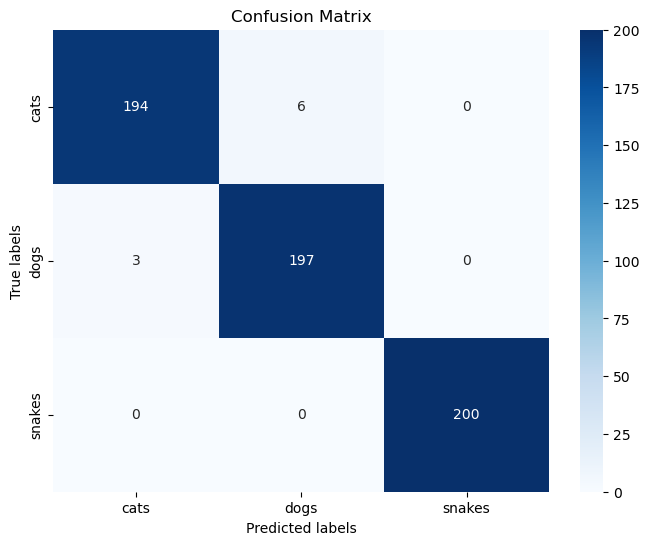

In [6]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

# accuracy, precision, recall, and F1-score

# Get the ground truth labels
y_true = test_generator.classes

# Get the predicted labels
y_pred = model.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

# Generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

<h2 id="saving-the-model" style="text-align:center;">Saving the model</h2>

In [7]:
# Save the model
model.save('animal_classifier.keras')
print("Model saved as 'animal_classifier.keras'.")

Model saved as 'animal_classifier.keras'.


<h2 id="user-interface" style="text-align:center;">User interface</h2>

In [9]:
# Class labels
labels = {0: 'Cat', 1: 'Dog', 2: 'Snake'}

# Global variables for UI components
image_label = None
prediction_label = None
probability_label = None 

# Predict function that takes in an image path and returns the predicted class
def predict(img_path):
    img = keras_image.load_img(img_path, target_size=(256, 256))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=-1)[0]
    probability = np.max(predictions)  # Get the max probability value
    predicted_label = labels[predicted_class_index]
    return predicted_label, probability

# Function to display the selected image and make a prediction
def select_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        display_image(file_path)
        predicted_class, probability = predict(file_path)  # Adjusted to receive two return values
        prediction_label.config(text=predicted_class)
        probability = probability * 100
        probability_label.config(text=f"Probability: {probability:.2f}%")  # Display the probability

# Function to update the image label with the selected image
def display_image(img_path):
    global image_label
    img = Image.open(img_path)
    img = ImageOps.fit(img, (256, 256), Image.Resampling.LANCZOS)
    img = ImageTk.PhotoImage(img)
    image_label.config(image=img)
    image_label.image = img  # Keep a reference

# Exit function to close the application
def exit_app():
    root.destroy()

def on_enter(e):
    select_button.config(background='gray', foreground='white')

def on_leave(e):
    select_button.config(background='black', foreground='white')

# UI setup
root = tk.Tk()
root.title("Animal Classifier")

# Make the root window cover the entire screen
root.state('zoomed')

# Header frame for title and exit button
header_frame = tk.Frame(root)
header_frame.pack(fill='x')

title_label = tk.Label(header_frame, text="Animal Classifier", font=("Arial", 40))
title_label.pack(side='top', expand=True)

sub_title_label = tk.Label(header_frame, text="Cat | Dog | Snake", font=("Arial", 20))
sub_title_label.pack(side='top', expand=True)

exit_button = tk.Button(header_frame, text="Exit", command=exit_app)
exit_button.pack(side='top', expand=True, pady=10)

# Content frame for the image, arrow, and prediction label
content_frame = tk.Frame(root)
content_frame.pack(expand=True)

# Frame for image and prediction
image_prediction_frame = tk.Frame(content_frame)
image_prediction_frame.pack(pady=50)

# Initialize the label for image preview
image_label = tk.Label(image_prediction_frame, borderwidth=2, relief="groove")
image_label.pack(side='top', padx=10)


# Initialize the label for prediction
prediction_label = tk.Label(image_prediction_frame, text="Class", font=("Arial", 30))
prediction_label.pack(side='bottom', padx=10)

# Frame for probability
probability = tk.Frame(content_frame)
probability.pack(pady=10)

# Initialize the label for probability
probability_label = tk.Label(probability, text="Probability: ", font=("Arial", 20))
probability_label.pack(side='bottom', padx=0)  # Adjust as needed

# Button frame for select button
button_frame = tk.Frame(root)
button_frame.pack(side='bottom', pady=100)

select_button = tk.Button(button_frame, text="Select Animal", command=select_image)
select_button.config(height=4, width=20)
select_button.config(background='black', foreground='white')
# Add these bindings after creating the select_button
select_button.bind("<Enter>", on_enter)
select_button.bind("<Leave>", on_leave)

select_button.pack()

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
